In [200]:
%matplotlib inline
import csv
import matplotlib
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
import pandas as pd

In [201]:
df = pd.read_csv('/home/metal-machine/Desktop/goog.csv')

In [202]:
df.head()

,﻿Date,Open,High,Low,Close,Volume
0,26-Feb-16,708.58,713.43,700.86,705.07,2239978
1,25-Feb-16,700.01,705.98,690.58,705.75,1631855
2,24-Feb-16,688.92,700.00,680.78,699.56,1958611
3,23-Feb-16,701.45,708.40,693.58,695.85,1999699
4,22-Feb-16,707.45,713.24,702.51,706.46,1946067


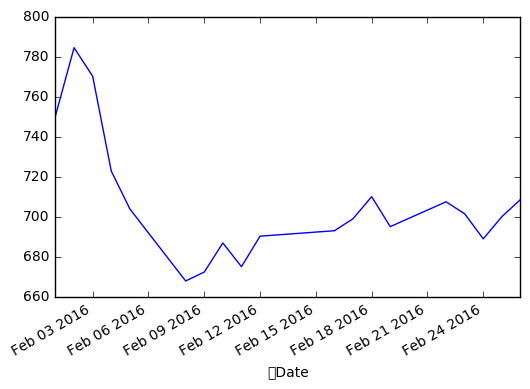

In [203]:
linear_mod = linear_model.LinearRegression()
#date1 = pd.to_datetime(df['Date'], format='%d/%m/%y', errors='coerce')
m = df.columns[0]
df['\xef\xbb\xbfDate']=pd.to_datetime(df['\xef\xbb\xbfDate'])
dates = pd.to_datetime(df['\xef\xbb\xbfDate'])

df = df.set_index('\xef\xbb\xbfDate')
df['Open'].plot()


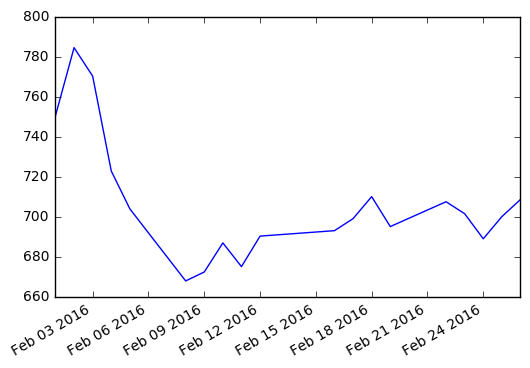

In [204]:
dates = np.reshape(dates,(len(dates),1))
prices = np.reshape(df['Open'],(len(dates),1))
plt.plot(dates,prices)
plt.gcf().autofmt_xdate()
plt.show()

In [205]:
linear_mod.fit(dates,prices)
#linear_mod.predict(dates
linear_mod.predict(dates)

#plt.plot(dates,linear_mod.predict(dates),color='blue',linewidth=3)

TypeError: Cannot cast array data from dtype('<M8[ns]') to dtype('float64') according to the rule 'safe'

In [206]:
import csv
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline

dates = []
prices = []

def get_data(filename):
    with open(filename,'r') as csvfile:
        csvFileReader = csv.reader(csvfile)
        next(csvFileReader) #skipping column names
        for row in csvFileReader:
            dates.append(row[0])
            prices.append(row[1])
    return

def show_plot(dates,prices):
	linear_mod = linear_model.LinearRegression()
	dates = np.reshape(dates,(len(dates),1)) # converting to matrix of n X 1
	prices = np.reshape(prices,(len(prices),1))
	linear_mod.fit(dates,prices) #fitting the data points in the model
	plt.scatter(dates,prices,color='yellow') #plotting the initial datapoints 
	plt.plot(dates,linear_mod.predict(dates),color='blue',linewidth=3) #plotting the line made by linear regression
	plt.show()
	return

def predict_price(dates,prices,x):
	linear_mod = linear_model.LinearRegression() #defining the linear regression model
	dates = np.reshape(dates,(len(dates),1)) # converting to matrix of n X 1
	prices = np.reshape(prices,(len(prices),1))
	linear_mod.fit(dates,prices) #fitting the data points in the model
	predicted_price =linear_mod.predict(x)
	return predicted_price[0][0],linear_mod.coef_[0][0] ,linear_mod.intercept_[0]

get_data('goog.csv') # calling get_data method by passing the csv file to it
print dates
print prices
show_plot(dates,prices)

['26-Feb-16', '25-Feb-16', '24-Feb-16', '23-Feb-16', '22-Feb-16', '19-Feb-16', '18-Feb-16', '17-Feb-16', '16-Feb-16', '12-Feb-16', '11-Feb-16', '10-Feb-16', '9-Feb-16', '8-Feb-16', '5-Feb-16', '4-Feb-16', '3-Feb-16', '2-Feb-16', '1-Feb-16']
['708.58', '700.01', '688.92', '701.45', '707.45', '695.03', '710.00', '699.00', '692.98', '690.26', '675.00', '686.86', '672.32', '667.85', '703.87', '722.81', '770.22', '784.50', '750.46']


ValueError: invalid literal for float(): 26-Feb-16